In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# EDA - Trimestral data

## 1. Load data and generate merged dataset

In [20]:
df = pd.read_parquet('../data_files/ingresos_clean.parquet')

df_aux = pd.read_parquet('../data_files/totales_vmd_clean.parquet', columns=(['Periodo', 'Mbps (Media de bajada)']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df_aux = pd.read_parquet('../data_files/accesos_totales_tecnologia_clean.parquet', columns=(['Periodo', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df_aux = pd.read_parquet('../data_files/penetracion_totales_clean.parquet', columns=(['Periodo', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']))
df = pd.merge(df, df_aux, how='left', on=['Periodo'])

df.sort_values(by=['Periodo'], inplace=True)
print('Dataset shape:', df.shape)
df.head()



Dataset shape: (42, 14)


,index,Año,Trimestre,Ingresos (miles de pesos),Periodo,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares,Accesos por cada 100 hab
41,41,2014,1,2.984054e+06,2014T1,3.617127,3697066,2407330,150323,70749,72930,6398398,49.545821,15.050104
40,40,2014,2,3.270816e+06,2014T2,3.758712,3708882,2461670,149363,72405,72148,6464468,49.861428,15.163908
39,39,2014,3,3.478638e+06,2014T3,3.867265,3714764,2569868,155494,85096,70049,6595271,50.672368,15.428769
38,38,2014,4,3.950441e+06,2014T4,4.156888,3764038,2536219,149682,76984,71573,6598496,50.499788,15.394677
37,37,2015,1,4.876385e+06,2015T1,4.350279,3756153,2668248,168188,79098,66045,6737732,51.364586,15.677234


## 1. Numerical Data

### Correlationship between variables

### Income analysis "Ingresos (miles de pesos)"

In [21]:
#Correlation matrix
selected_columns = ['Ingresos (miles de pesos)', 'Mbps (Media de bajada)', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
df[selected_columns].corr()

,Ingresos (miles de pesos),Mbps (Media de bajada),Accesos por cada 100 hogares,Accesos por cada 100 hab
Ingresos (miles de pesos),1.000000,0.824029,0.654199,0.659418
Mbps (Media de bajada),0.824029,1.000000,0.895075,0.898108
Accesos por cada 100 hogares,0.654199,0.895075,1.000000,0.999947
Accesos por cada 100 hab,0.659418,0.898108,0.999947,1.000000


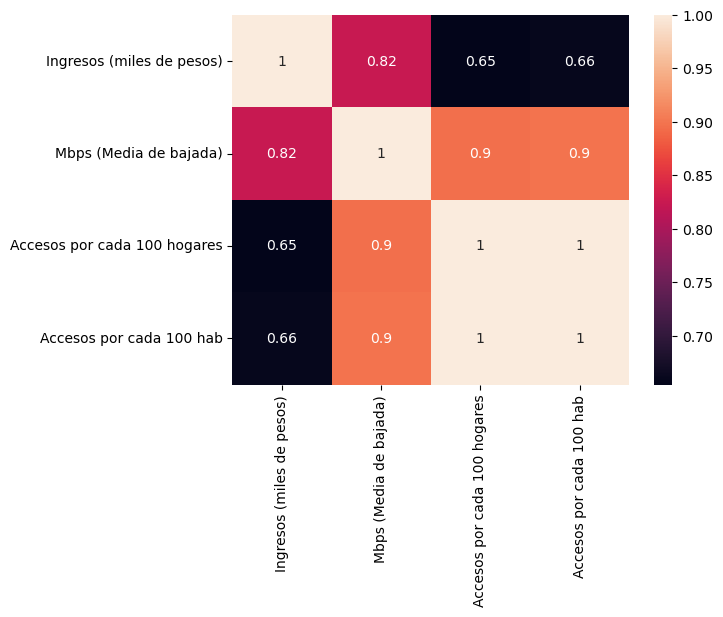

In [22]:
sns.heatmap(df[selected_columns].corr(), annot=True)
plt.show()

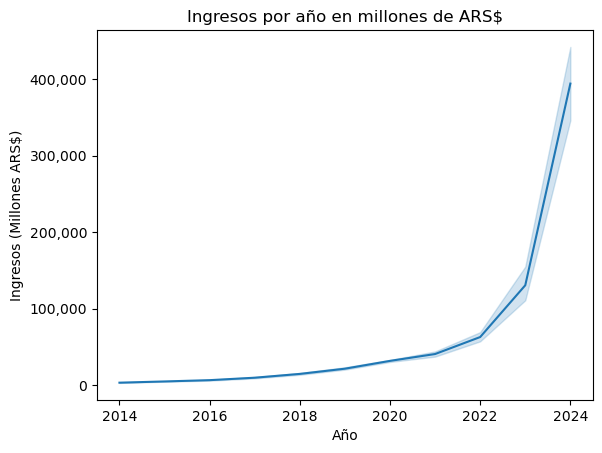

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(18,5))

#first plot

sns.lineplot(data=df, x=df['Año'], y=df['Ingresos (miles de pesos)']/1000, ax=ax[0,0])
plt.title('Ingresos por año en millones de ARS$')
ax[0,0].set(xlabel='Año', ylabel='Ingresos (Millones ARS$)')
ax[0,0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


#### The income have a constant growth pattern, from 2021 the growth have an expotential increment given, in a first approach, by the volatility of the currency in Argentina. To validate this, we will do a correlation analysis to see if there is a correlation between the income and another variable.

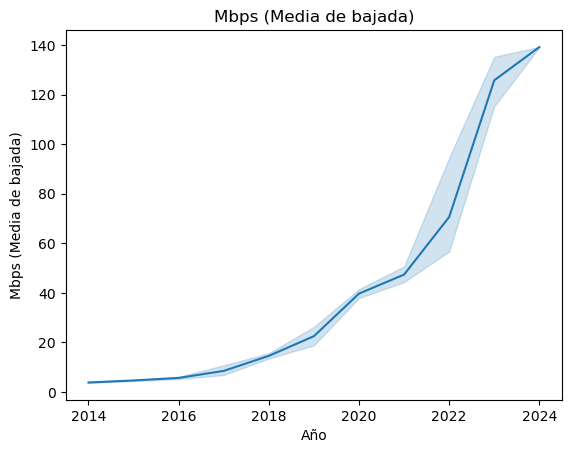

In [9]:
income_plot = sns.lineplot(data=df, x=df['Año'], y=df['Mbps (Media de bajada)'])
plt.title('Mbps (Media de bajada)')
income_plot.set(xlabel='Año', ylabel='Mbps (Media de bajada)')
income_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

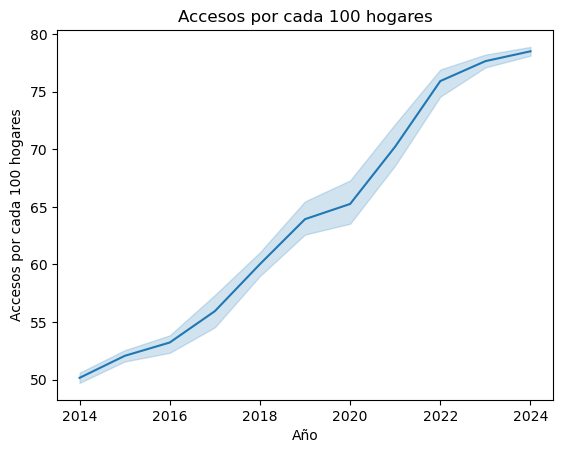

In [10]:
income_plot = sns.lineplot(data=df, x=df['Año'], y=df['Accesos por cada 100 hogares'])
plt.title('Accesos por cada 100 hogares')
income_plot.set(xlabel='Año', ylabel='Accesos por cada 100 hogares')
income_plot.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()